In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [11]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [13]:
data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [14]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


DATA VISUALISATION

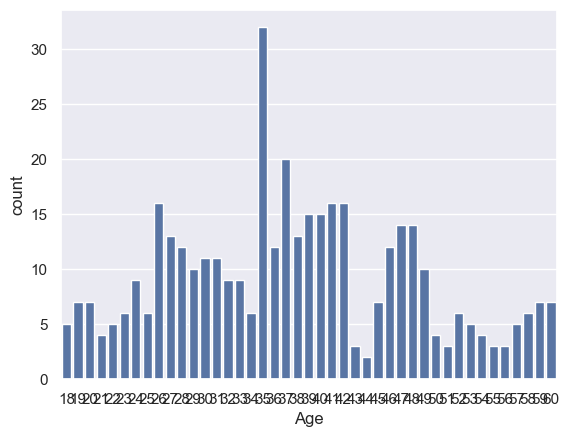

In [15]:
x= data['Age']
ax= sns.countplot(x=x, data=data)

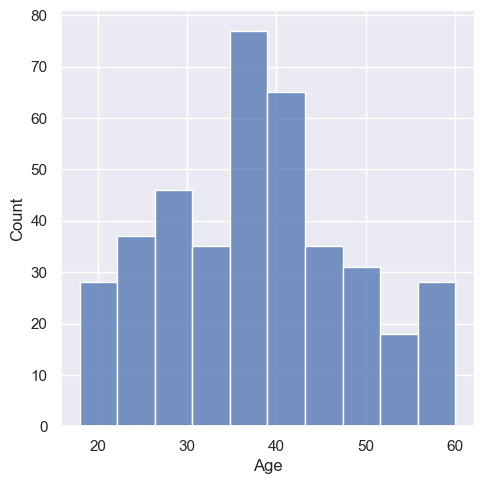

In [16]:
sns.displot(data['Age'])

<Axes: xlabel='count', ylabel='Gender'>

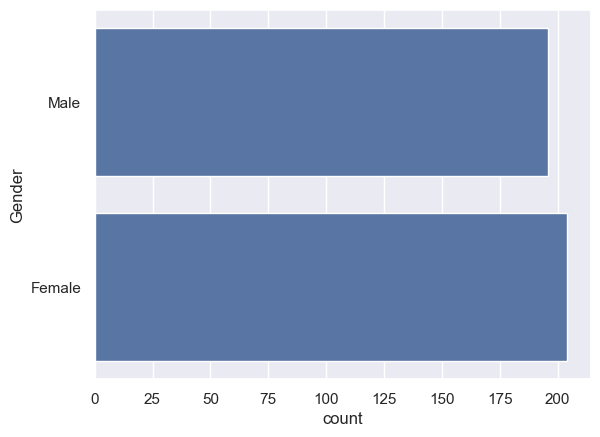

In [17]:
sns.countplot(data['Gender'])

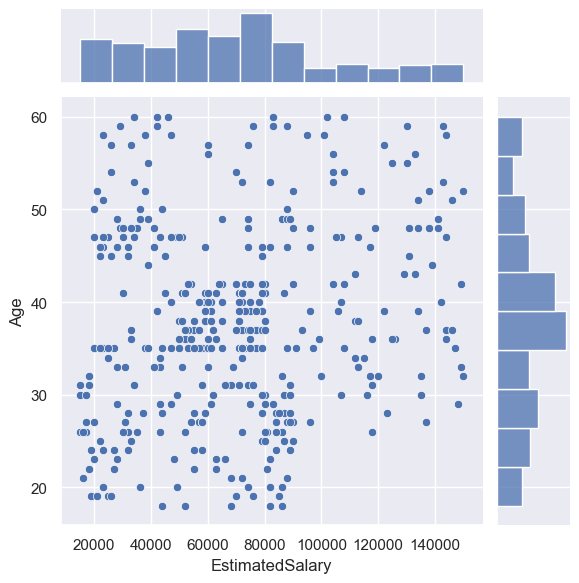

In [22]:
xlabel=data['EstimatedSalary']
ylabel=data['Age']
sns.jointplot(data=data, x=xlabel, y= ylabel)

FEATURE SCALING
(FOR 80:20 RATIO)

In [23]:
#Importing the dataset
x= data.iloc[:, [2,3]].values
y=data.iloc[:,4].values

In [39]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

In [41]:
#Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9375

CONFUSION MATRIX

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[54,  4],
       [ 1, 21]])

In [56]:
#ROC
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test, y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.9069157147267675

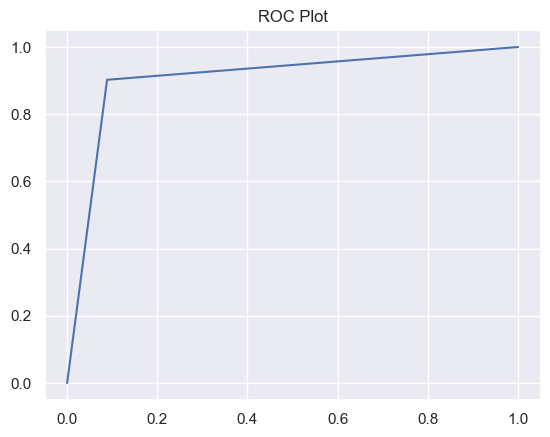

In [57]:
plt.plot(fpr,tpr, linestyle='-', label='KNN'% roc_auc)
# Title
plt.title('ROC Plot')
plt.show()

FEATURE SCALING
(FOR 70:30 RATIO)

In [50]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [52]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

#Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9083333333333333

In [64]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[94,  7],
       [ 7, 52]])

In [54]:
#ROC
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test, y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.9069157147267675

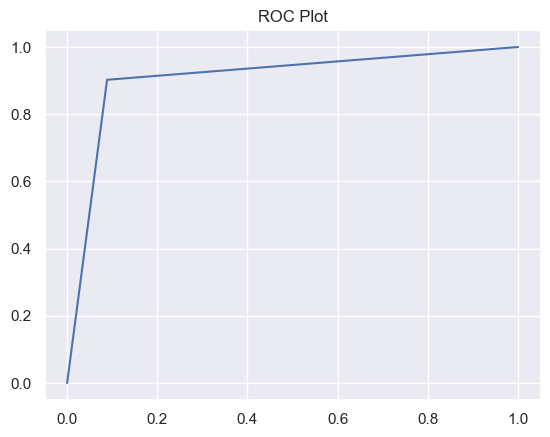

In [55]:
plt.plot(fpr,tpr, linestyle='-', label='KNN'% roc_auc)
# Title
plt.title('ROC Plot')
plt.show()

FEATURE SCALING
(FOR 60:40 RATIO)

In [66]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)

In [67]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

#Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9125

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[94,  7],
       [ 7, 52]])

In [69]:
#ROC
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test, y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.9060245007551602

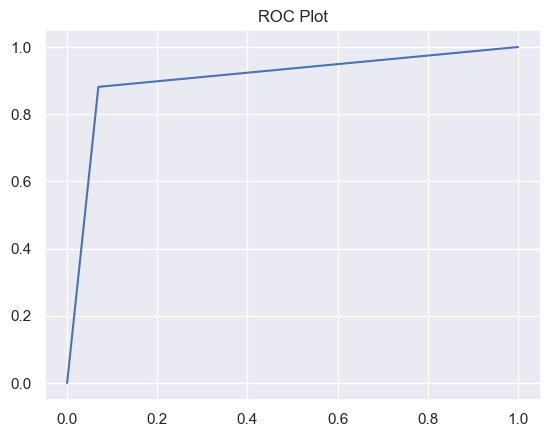

In [70]:
plt.plot(fpr,tpr, linestyle='-', label='KNN'% roc_auc)
# Title
plt.title('ROC Plot')
plt.show()